In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('TurkishSMSCollection.csv',sep=";")

In [3]:
df.sample(5) #Karışık olarak 5 tane veri getiriyor

,Message,Group,GroupText
2585,Kampanya:VakifBank WorldCard ile 3-29 Subat ar...,1,Spam
4130,Teşekkürlerrrrr:),2,Normal
4604,Yilbasina ozel %60 indirim ve 4 taksit imkaniy...,1,Spam
2513,"KAMPANYA: SEKIZ.COM DA TUM TISORTLER 19,90TL V...",1,Spam
267,Aa emine iyiyim sen nasısın,2,Normal


In [4]:
df.shape #Satır ve sütün sayısı

(4751, 3)

##  Data Cleaning

In [5]:
df.info() # sütüların veri tipleri nedir 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4751 entries, 0 to 4750
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Message    4751 non-null   object
 1   Group      4751 non-null   int64 
 2   GroupText  4751 non-null   object
dtypes: int64(1), object(2)
memory usage: 111.5+ KB


In [6]:
df.isnull().sum() # Boş verilerin sayısını getiriyor

Message      0
Group        0
GroupText    0
dtype: int64

In [7]:
df.duplicated().sum()# Tekrarlayan veri sayısı

11

In [8]:
df = df.drop_duplicates(keep='first')#Tekrarlayan verileri sil

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(4740, 3)

## Exploratory Data Cleaning

In [11]:
print(df.columns)

Index(['Message', 'Group', 'GroupText'], dtype='object')


In [12]:
df.drop(columns=['GroupText'],inplace=True) #İstenmeyen sütünu çıkar

In [13]:
df.sample(5)

,Message,Group
3696,Siz baska telefon bakin iyi gunler,2
1318,"Degerli Uyemiz, MatchAndTalk capslock35 rumuzl...",1
3344,"Paraf uyesi giyim, aksesuar ve kozmetik magaza...",1
2873,Memet hocaya güldüm hocanın Ayşe ile problemi ...,2
283,Abi buluruz bi şekilde ??,2


In [14]:
df['Group'].value_counts() #Gruplandırılmış verilerin kaç tane 1 ve 0 olduğunu bul

Group
1    2526
2    2214
Name: count, dtype: int64

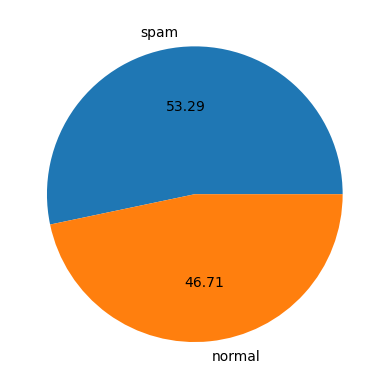

In [15]:
# Verilere pasta grafiği çiz
import matplotlib.pyplot as plt
plt.pie(df['Group'].value_counts(), labels=['spam','normal'],autopct="%0.2f")
plt.show()

In [16]:
import nltk # doğal dil işleme kütüphanesi yüklü değilse aşağıdaki terminal kodu ile yükler

In [17]:
!pip install nltk 

Defaulting to user installation because normal site-packages is not writeable


In [18]:
nltk.download('punkt') #cümleleri ve kelimeleri ayırmak için kullanılan tokenizer paketi

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MONSTER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['KarakterSayisi'] = df['Message'].apply(len) # Mesajdaki karakter sayisini bulan ve yeni sütüna ekleyen kod

In [20]:
df.head()

,Message,Group,KarakterSayisi
0,125 lira,2,8
1,Baskanin aksam toplantısi fenaymis :),2,37
2,Bilal yalçnlara ne zaman gidiyoruz?,2,35
3,"BiP ile mesajlarimi aninda, daha eglenceli gon...",1,99
4,DIGITURKTEN FIRSAT! SiZE OZEL YIL SONUNA KADAR...,1,157


In [21]:
df['KelimeSayisi'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))#Cümle sayısını bulan kod

In [22]:
df.sample(5)

,Message,Group,KarakterSayisi,KelimeSayisi
1894,"Hafta bitti, indirim geldi! Arzum otomatik çay...",1,140,23
2581,KAMPANYA:SANA OZEL!Whopper+ChickenRoyale+KingC...,1,255,29
1740,geçen geldiğimde yalçınlarda kaldım uzun süre ...,2,136,19
3974,tamam canım o zaman başka zamana,2,32,6
2262,"inci, 30 TL aninda indirim firsatiyla bugun Tr...",1,102,15


In [23]:
df['CümleSayisi'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x))) #Cümle sayisini bulan kod

In [24]:
df.sample(5)

,Message,Group,KarakterSayisi,KelimeSayisi,CümleSayisi
2763,Kucak dolusu sevgiler,2,21,3,1
1799,GollerCepte'den 1 kisiye takiminin renklerine ...,1,208,26,2
2011,Her turlu nakit ihtiyacinizda GARANTI yaninizd...,1,275,39,3
2247,ikinci gonderdigim yasinin bavulu deil mi bi a...,2,67,11,1
3708,Siz ogretmenlerimize ozel 364 TL taksitle 10.0...,1,255,36,4


In [25]:
df[['KarakterSayisi','KelimeSayisi','CümleSayisi']].describe() #İstatistiksel özet bilgileri

,KarakterSayisi,KelimeSayisi,CümleSayisi
count,4740.000000,4740.000000,4740.000000
mean,115.539873,18.633755,1.859494
std,77.215461,12.339078,1.093674
min,1.000000,1.000000,1.000000
25%,39.000000,7.000000,1.000000
50%,130.000000,20.000000,1.000000
75%,160.000000,27.000000,3.000000
max,453.000000,71.000000,7.000000


In [26]:
# Spam mesajlara ait istatistiksel özet bilgiler
df[df['Group'] == 1][['KarakterSayisi','KelimeSayisi','CümleSayisi']].describe() 

,KarakterSayisi,KelimeSayisi,CümleSayisi
count,2526.000000,2526.000000,2526.000000
mean,176.126683,28.072051,2.452494
std,46.856459,8.026611,1.084143
min,59.000000,3.000000,1.000000
25%,150.000000,23.000000,2.000000
50%,159.000000,27.000000,2.000000
75%,214.000000,33.000000,3.000000
max,453.000000,71.000000,7.000000


In [27]:
#Normal mesajlara ait istatistiksel özet bilgiler
df[df['Group'] ==2 ][['KarakterSayisi','KelimeSayisi','CümleSayisi']].describe() 

,KarakterSayisi,KelimeSayisi,CümleSayisi
count,2214.000000,2214.000000,2214.000000
mean,46.415086,7.865402,1.182927
std,35.949012,5.902502,0.600841
min,1.000000,1.000000,1.000000
25%,22.000000,4.000000,1.000000
50%,37.000000,6.000000,1.000000
75%,59.000000,10.000000,1.000000
max,255.000000,47.000000,7.000000


In [28]:
import seaborn as sns #Veri görselleştirme kümesi
import matplotlib.pyplot as plt

<Axes: xlabel='KarakterSayisi', ylabel='Count'>

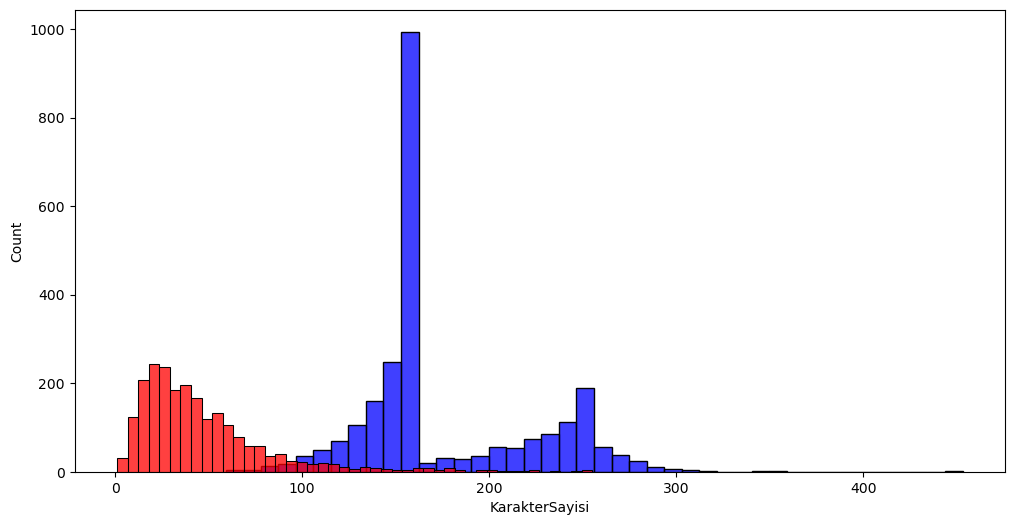

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Group'] == 1]['KarakterSayisi'],color="blue")
sns.histplot(df[df['Group'] == 2]['KarakterSayisi'],color='red')

<Axes: xlabel='KelimeSayisi', ylabel='Count'>

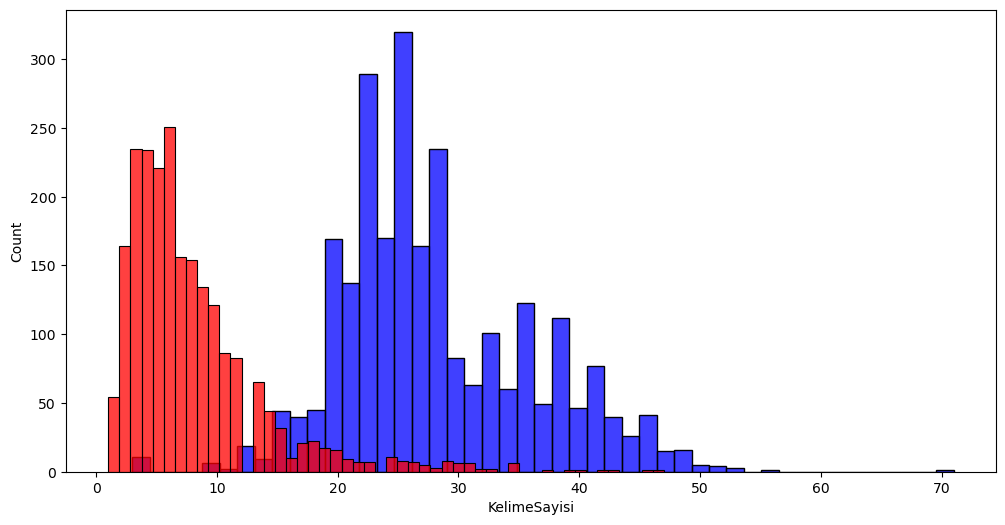

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Group'] == 1]['KelimeSayisi'],color="blue")
sns.histplot(df[df['Group'] == 2]['KelimeSayisi'],color='red')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


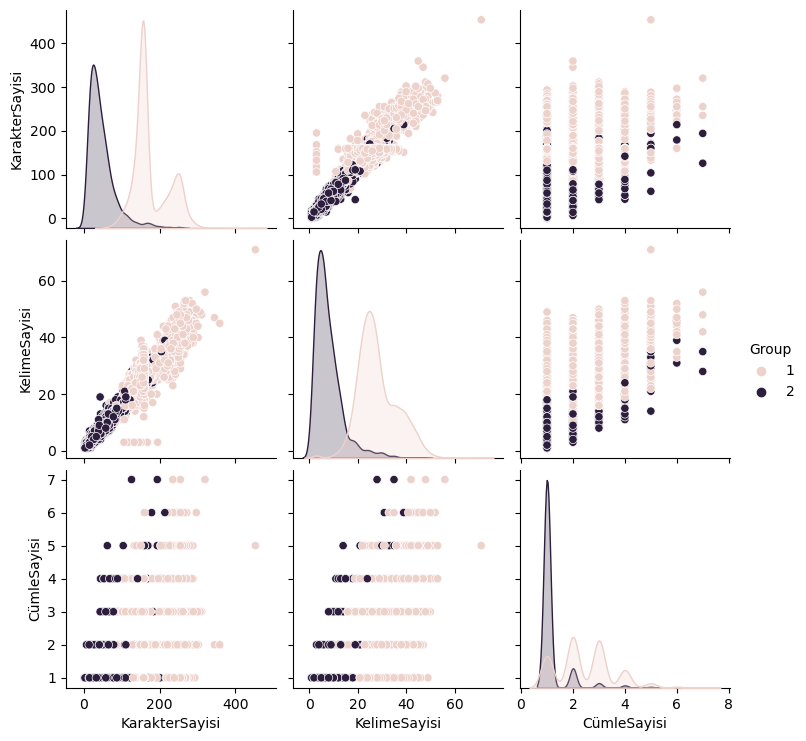

In [31]:
sns.pairplot(df,hue='Group')

<Axes: >

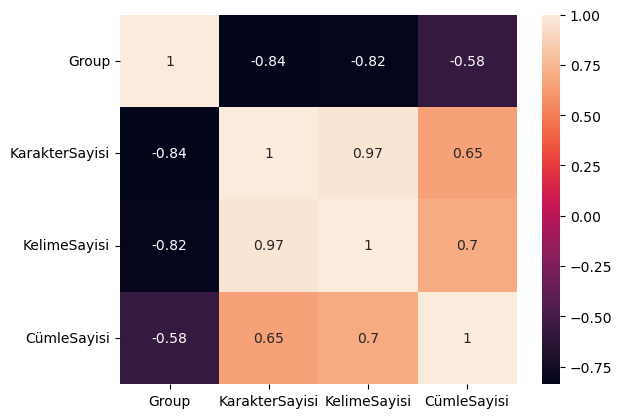

In [32]:
sns.heatmap(df.select_dtypes(include=[float, int]).corr(), annot=True)


## Data Processing

In [33]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MONSTER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords
stopwords.words('turkish')

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
pip install zemberek-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install backports.tarfile  

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
import zemberek

In [39]:
from zemberek import TurkishMorphology
from zemberek import TurkishSentenceNormalizer
from zemberek import TurkishSpellChecker
from zemberek import TurkishTokenizer 

In [40]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [41]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            

    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('turkish') and i not in string.punctuation:
            y.append(i)
        
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(find_stem(i))
        
    return " ".join(y)

In [42]:
tokenizer=TurkishTokenizer.DEFAULT
morphology=TurkishMorphology.create_with_defaults()
spell_checker=TurkishSpellChecker(morphology)

2025-01-05 05:55:40,522 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 5.1380839347839355



In [43]:
def find_stem(word):
    analysis = morphology.analyze(word)
    # Analiz sonucunu bir listeye çevir
    analysis_list = [analysis]
    # En iyi analizi bul
    results = morphology.disambiguate(word, analysis_list).best_analysis()
    for result in results:
        return result.get_stem()

find_stem("Okulda")

'okul'

In [44]:
df['DonusturulmusMetin'] = df['Message'].apply(transform_text)

In [45]:
df.sample(5)

,Message,Group,KarakterSayisi,KelimeSayisi,CümleSayisi,DonusturulmusMetin
2739,Kolay gelsin sana ;),2,20,5,1,kolay gel san
4341,"VakifBank Worldcarda gida,giyim,restoranda ilk...",1,160,27,2,vakifbank worldcard gida giyim restoran ilk 10...
3981,Tamam gayet profesyonel görünüyor ilan.,2,39,6,1,tamam gayet profesyonel görün ilan
276,Abi ara demiştin ya öğlene doğru ondan aradım,2,45,8,1,abi ara de öğlen doğru o ara
2681,Kesinlikle :),2,13,3,1,kesinlikle


In [46]:
pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:
spam_wc = wc.generate(df[df['Group'] == 1]['DonusturulmusMetin'].str.cat(sep=" "))

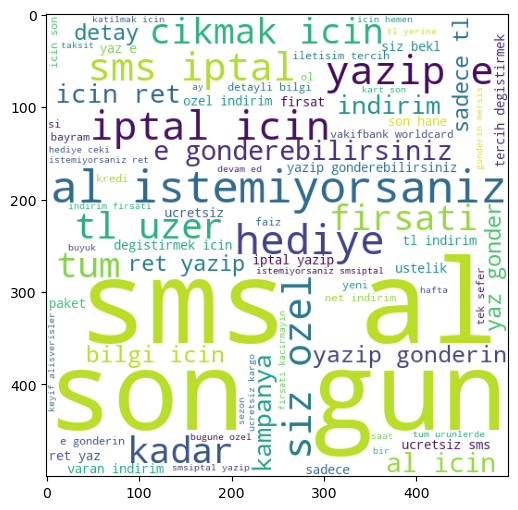

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [50]:
normal_wc = wc.generate(df[df['Group'] == 2]['DonusturulmusMetin'].str.cat(sep=" "))

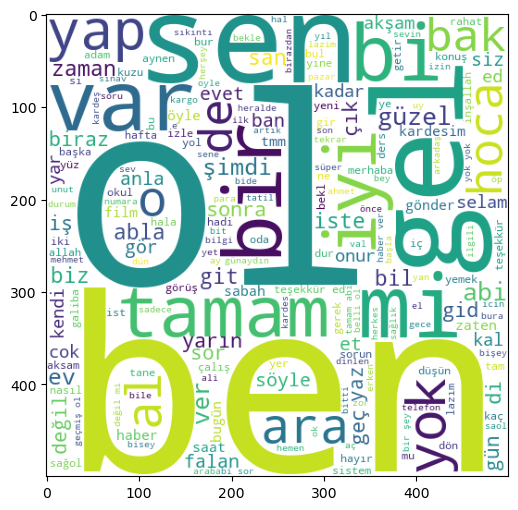

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(normal_wc)

In [52]:
spam_corpus = []
for msg in df[df['Group'] == 1]['DonusturulmusMetin'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [53]:
len(spam_corpus)

50516

In [54]:
pip install Counter

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


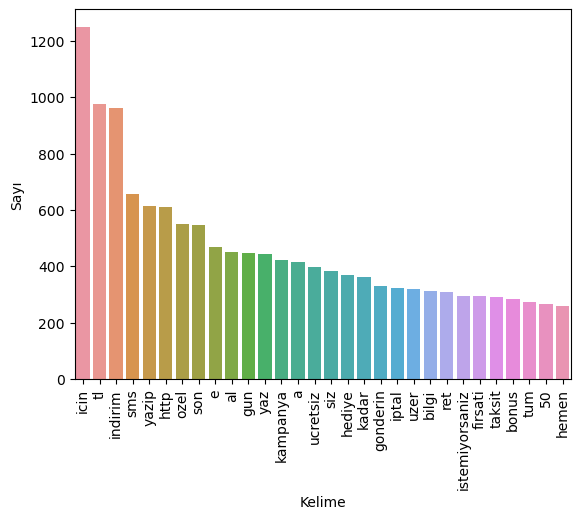

In [55]:
from collections import Counter
common_words = Counter(spam_corpus).most_common(30)

# DataFrame'e çevir
df_common_words = pd.DataFrame(common_words, columns=['Kelime', 'Sayı'])

# Barplot oluştur
sns.barplot(x='Kelime', y='Sayı', data=df_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
normal_corpus = []
for msg in df[df['Group'] ==2]['DonusturulmusMetin'].tolist():
    for word in msg.split():
        normal_corpus.append(word)

In [57]:
len(normal_corpus)

13605

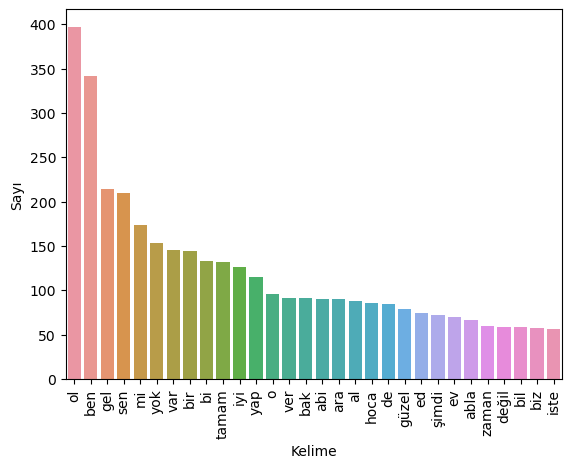

In [58]:

common_words = Counter(normal_corpus).most_common(30)

# DataFrame'e çevir
df_common_words = pd.DataFrame(common_words, columns=['Kelime', 'Sayı'])

# Barplot oluştur
sns.barplot(x='Kelime', y='Sayı', data=df_common_words)
plt.xticks(rotation='vertical')
plt.show()

## Model Building 

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X = tfidf.fit_transform(df['DonusturulmusMetin']).toarray()

In [61]:
# Sms ve kelime sayısını verir
X.shape

(4740, 3000)

In [62]:
#1-->0 == SPAM ;; 2-->1 == NORMAL
y = df['Group'].map({1: 0, 2: 1}).values

In [63]:
y

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9841772151898734
[[511   3]
 [ 12 422]]
0.9929411764705882


In [69]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9715189873417721
[[507   7]
 [ 20 414]]
0.9833729216152018


In [70]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9831223628691983
[[499  15]
 [  1 433]]
0.9665178571428571


In [71]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [73]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [74]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AddBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [75]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
 
    
    return  accuracy, precision

In [76]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9883966244725738, 0.9795918367346939)

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [113]:
accuracy_scores = []
precision_scores = []
r2_scores = []
rmse_scores = []
mae_scores = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    # Model tahminleri
    y_pred = clf.predict(X_test)
    
    # R2, RMSE ve MAE hesaplama
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False, RMSE verir
    mae = mean_absolute_error(y_test, y_pred)
    
    print(name, " için:")
    print("Doğruluk - ", current_accuracy)
    print("Kesinlik - ", current_precision)
    print("R2 - ", r2)
    print("RMSE - ", rmse)
    print("MAE - ", mae)
    print("----------------")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    mae_scores.append(mae)


C:\Users\MONSTER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SVC  için:
Doğruluk -  0.9883966244725738
Kesinlik -  0.9795918367346939
R2 -  0.9532535996700676
RMSE -  0.10771896549552526
MAE -  0.011603375527426161
----------------


C:\Users\MONSTER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MONSTER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KN  için:
Doğruluk -  0.6012658227848101
Kesinlik -  0.5344827586206896
R2 -  -0.6063763022467685
RMSE -  0.6314540182904769
MAE -  0.3987341772151899
----------------
NB  için:
Doğruluk -  0.9715189873417721
Kesinlik -  0.9833729216152018
R2 -  0.8852588355538022
RMSE -  0.1687631851389036
MAE -  0.028481012658227847
----------------


C:\Users\MONSTER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MONSTER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


DT  için:
Doğruluk -  0.8987341772151899
Kesinlik -  0.8225190839694656
R2 -  0.592031415302408
RMSE -  0.31822291367029204
MAE -  0.10126582278481013
----------------
LR  için:
Doğruluk -  0.9609704641350211
Kesinlik -  0.9324618736383442
R2 -  0.8427621079811365
RMSE -  0.19755894276134126
MAE -  0.039029535864978905
----------------


C:\Users\MONSTER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\MONSTER\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


RF  için:
Doğruluk -  0.9852320675105485
Kesinlik -  0.9751131221719457
R2 -  0.9405045813982679
RMSE -  0.12152338248029255
MAE -  0.014767932489451477
----------------


C:\Users\MONSTER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AddBoost  için:
Doğruluk -  0.9704641350210971
Kesinlik -  0.9551569506726457
R2 -  0.8810091627965356
RMSE -  0.1718600156490827
MAE -  0.029535864978902954
----------------


C:\Users\MONSTER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


BgC  için:
Doğruluk -  0.9725738396624473
Kesinlik -  0.9553571428571429
R2 -  0.8895085083110689
RMSE -  0.16560845490962334
MAE -  0.027426160337552744
----------------


C:\Users\MONSTER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ETC  için:
Doğruluk -  0.9883966244725738
Kesinlik -  0.9817767653758542
R2 -  0.9532535996700676
RMSE -  0.10771896549552526
MAE -  0.011603375527426161
----------------


C:\Users\MONSTER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


GBDT  için:
Doğruluk -  0.9367088607594937
Kesinlik -  0.8863636363636364
R2 -  0.745019634564005
RMSE -  0.2515773027133138
MAE -  0.06329113924050633
----------------
xgb  için:
Doğruluk -  0.9662447257383966
Kesinlik -  0.9388646288209607
R2 -  0.8640104717674694
RMSE -  0.18372608486985012
MAE -  0.03375527426160337
----------------


C:\Users\MONSTER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [117]:
# Algoritmaların sonuçlarını DataFrame'e dönüştürme
performance_df = pd.DataFrame({
    'Algoritma': clfs.keys(),
    'Doğruluk': accuracy_scores,
    'Kesinlik': precision_scores,
    'R2': r2_scores,
    'RMSE': rmse_scores,
    'MAE': mae_scores
}).sort_values('Kesinlik', ascending=False)


In [116]:
performance_df

,Algoritma,Doğruluk,Kesinlik,R2,RMSE,MAE
2,NB,0.971519,0.983373,0.885259,0.168763,0.028481
8,ETC,0.988397,0.981777,0.953254,0.107719,0.011603
0,SVC,0.988397,0.979592,0.953254,0.107719,0.011603
5,RF,0.985232,0.975113,0.940505,0.121523,0.014768
7,BgC,0.972574,0.955357,0.889509,0.165608,0.027426
6,AddBoost,0.970464,0.955157,0.881009,0.171860,0.029536
10,xgb,0.966245,0.938865,0.864010,0.183726,0.033755
4,LR,0.960970,0.932462,0.842762,0.197559,0.039030
9,GBDT,0.936709,0.886364,0.745020,0.251577,0.063291
3,DT,0.898734,0.822519,0.592031,0.318223,0.101266


In [118]:
performance_df1

,Algoritma,variable,value
0,NB,Doğruluk,0.971519
1,ETC,Doğruluk,0.988397
2,SVC,Doğruluk,0.988397
3,RF,Doğruluk,0.985232
4,BgC,Doğruluk,0.972574
5,AddBoost,Doğruluk,0.970464
6,xgb,Doğruluk,0.966245
7,LR,Doğruluk,0.960970
8,GBDT,Doğruluk,0.936709
9,DT,Doğruluk,0.898734


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


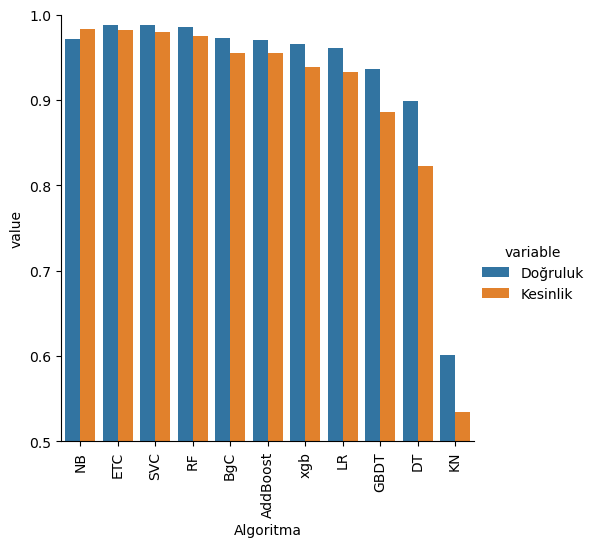

In [82]:
sns.catplot(x = 'Algoritma', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [83]:
temp_df = pd.DataFrame({
    'Algoritma': clfs.keys(),
    'Doğruluk_3000Klm': accuracy_scores,
    'Kesinlik_3000Klm': precision_scores
}).sort_values('Kesinlik_3000Klm', ascending=False)

In [84]:
temp_df = pd.DataFrame({
    'Algoritma': clfs.keys(),
    'Doğruluk_Ölçekleme': accuracy_scores,
    'Kesinlik_Ölçekleme': precision_scores
}).sort_values('Kesinlik_Ölçekleme', ascending=False)


In [85]:
new_df = performance_df.merge(temp_df,on='Algoritma')

In [86]:
new_df_scaled = new_df.merge(temp_df,on='Algoritma')

In [87]:
temp_df = pd.DataFrame({
    'Algoritma': clfs.keys(),
    'Doğruluk_Karakter_Sayısı': accuracy_scores,
    'Kesinlik_Karakter_Sayısı': precision_scores
}).sort_values('Kesinlik_Karakter_Sayısı', ascending=False)


In [88]:
# new_df_scaled.merge(temp_df,on='Algoritma')

In [89]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [90]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [91]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [92]:
y_pred = voting.predict(X_test)
print("Dogruluk",accuracy_score(y_test,y_pred))
print("Kesinlik",precision_score(y_test,y_pred))

Dogruluk 0.989451476793249
Kesinlik 0.9840182648401826


In [93]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [94]:
from sklearn.ensemble import StackingClassifier

In [95]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [96]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Dogruluk",accuracy_score(y_test,y_pred))
print("Kesinlik",precision_score(y_test,y_pred))

Dogruluk 0.990506329113924
Kesinlik 0.9885057471264368


In [156]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [150]:
# Verilen mesajı tahmin etmek için fonksiyon
def predict_spam(message):
    # Mesajı ön işleme tabi tutma
    processed_message = transform_text(message)
    
    # Mesajı vektöre dönüştürme
    X_new = tfidf.transform([processed_message]).toarray()
    
    # Modeli kullanarak tahmin yapma (örneğin, en iyi model olan 'voting' modelini kullanalım)
    prediction = voting.predict(X_new)
    
    # Sonucu yazdırma
    if prediction == 0:
        return "Spam mesaj"
    else:
        return "Normal mesaj"

In [152]:
user_input = "Annen elimizde , kurtulmasını istiyorsan sende trendyolda muhteşem sezon sonu indirimlerini kaçırma"
result = predict_spam(user_input)
print(result)


Spam mesaj
